In [1]:
import cartopy.crs as ccrs
import xarray as xr
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap, cm

import cartopy

In [2]:
%matplotlib inline

In [3]:
path = "/home/wanderson/Documentos/ncl/"

In [4]:
DS_NCEP = xr.open_dataset(path +'MAY2015_24Z_12Z_NCEP.nc')

In [5]:
da = DS_NCEP.prec.mean('time')

In [6]:
#var  = DS_NCEP.variables['prec'][0,:,:]
lons = DS_NCEP.variables['lon'][:]
lats = DS_NCEP.variables['lat'][:]

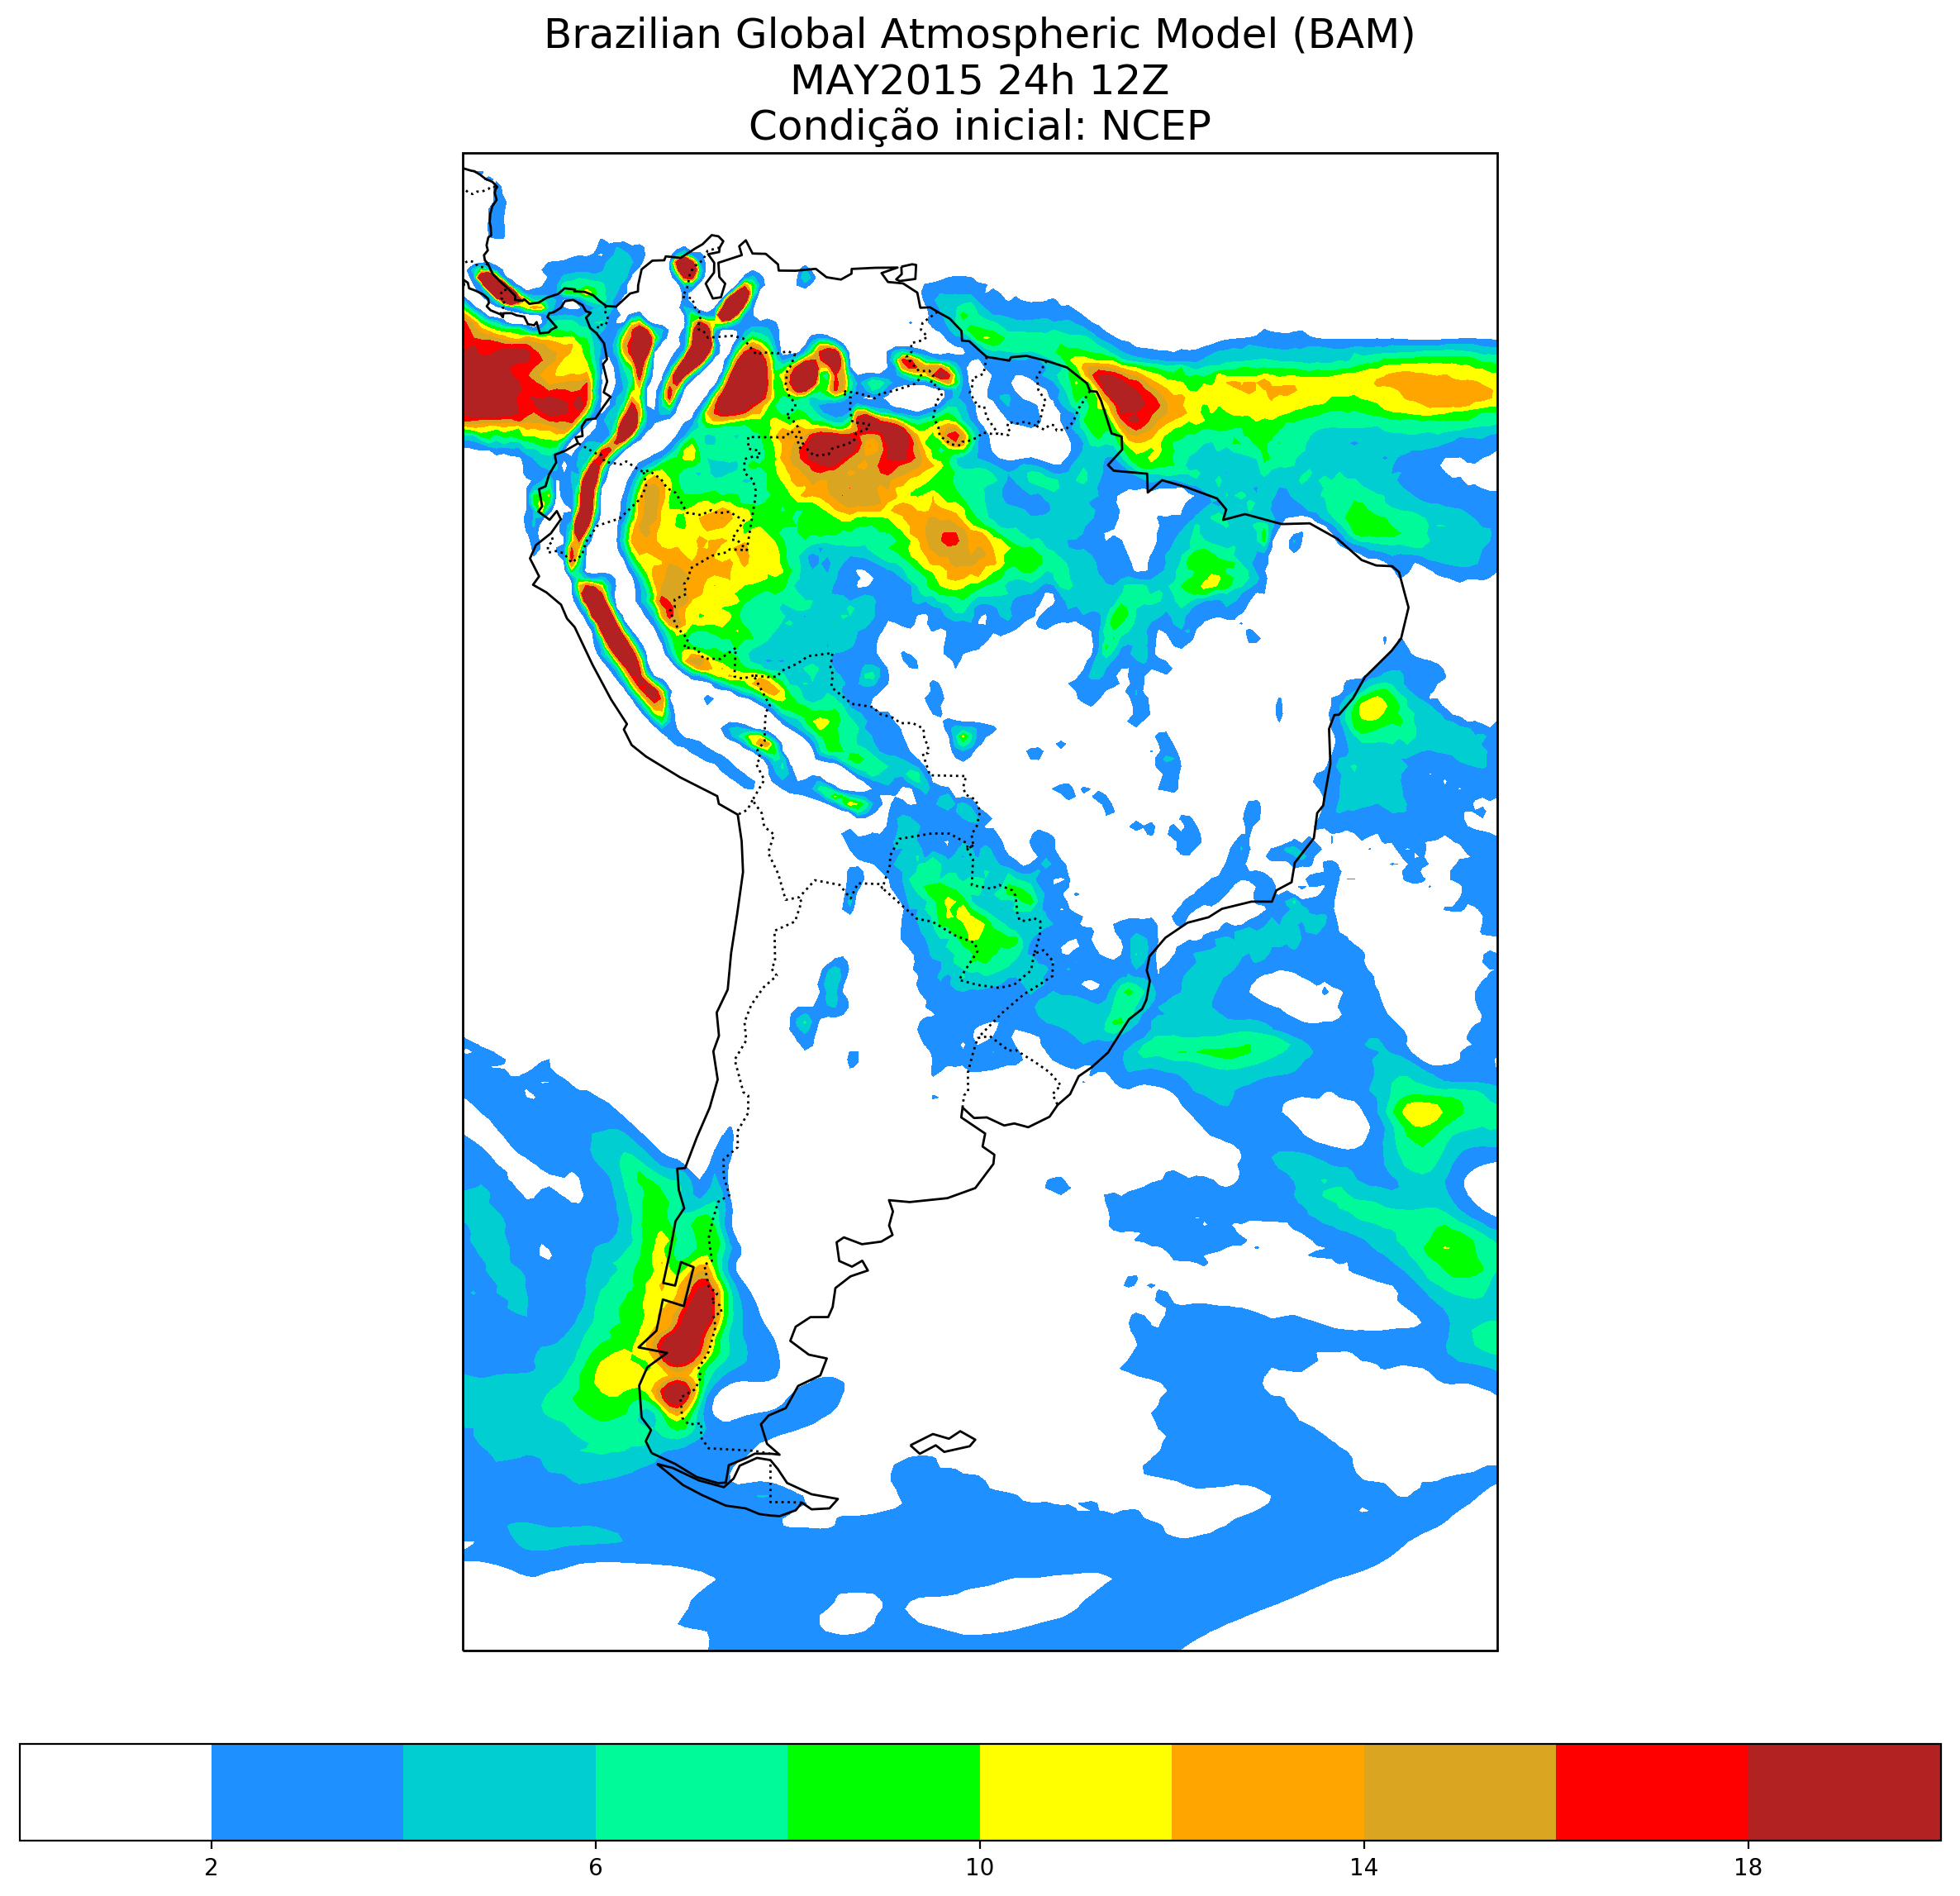

In [7]:
fig, ax = plt.subplots(111,figsize=(15,15), dpi=200)

ax = plt.axes(projection=ccrs.PlateCarree())
clevs=[-70,2,4,6,8,10,12,14,16,18,70]
color=['white','dodgerblue','darkturquoise','mediumspringgreen','lime','yellow',
       'orange','goldenrod','red','firebrick']
cp = plt.contourf(lons,lats,da, clevs, colors=color,zorder=1)


ax.coastlines(resolution='110m')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
#for BR
ax.set_extent([-85, -30, -60, 15])
ax.stock_img()
ax.set_title(
                       'Brazilian Global Atmospheric Model (BAM)' 
                     + '\n' 
                     + 'MAY2015 24h 12Z'
                     + '\n'
                     + 'Condição inicial: NCEP',
                     fontsize=18
)

fig.colorbar(cp, orientation='horizontal',pad=0.05)
fig.set_label('mm')

plt.show()

In [8]:
GPM = xr.open_dataset(path +'GPM_REC_ACUM_24h_grib2.nc')

In [9]:
te = GPM.PREC_surface.mean('time')


In [10]:
lons = GPM.variables['longitude'][:]
lats = GPM.variables['latitude'][:]

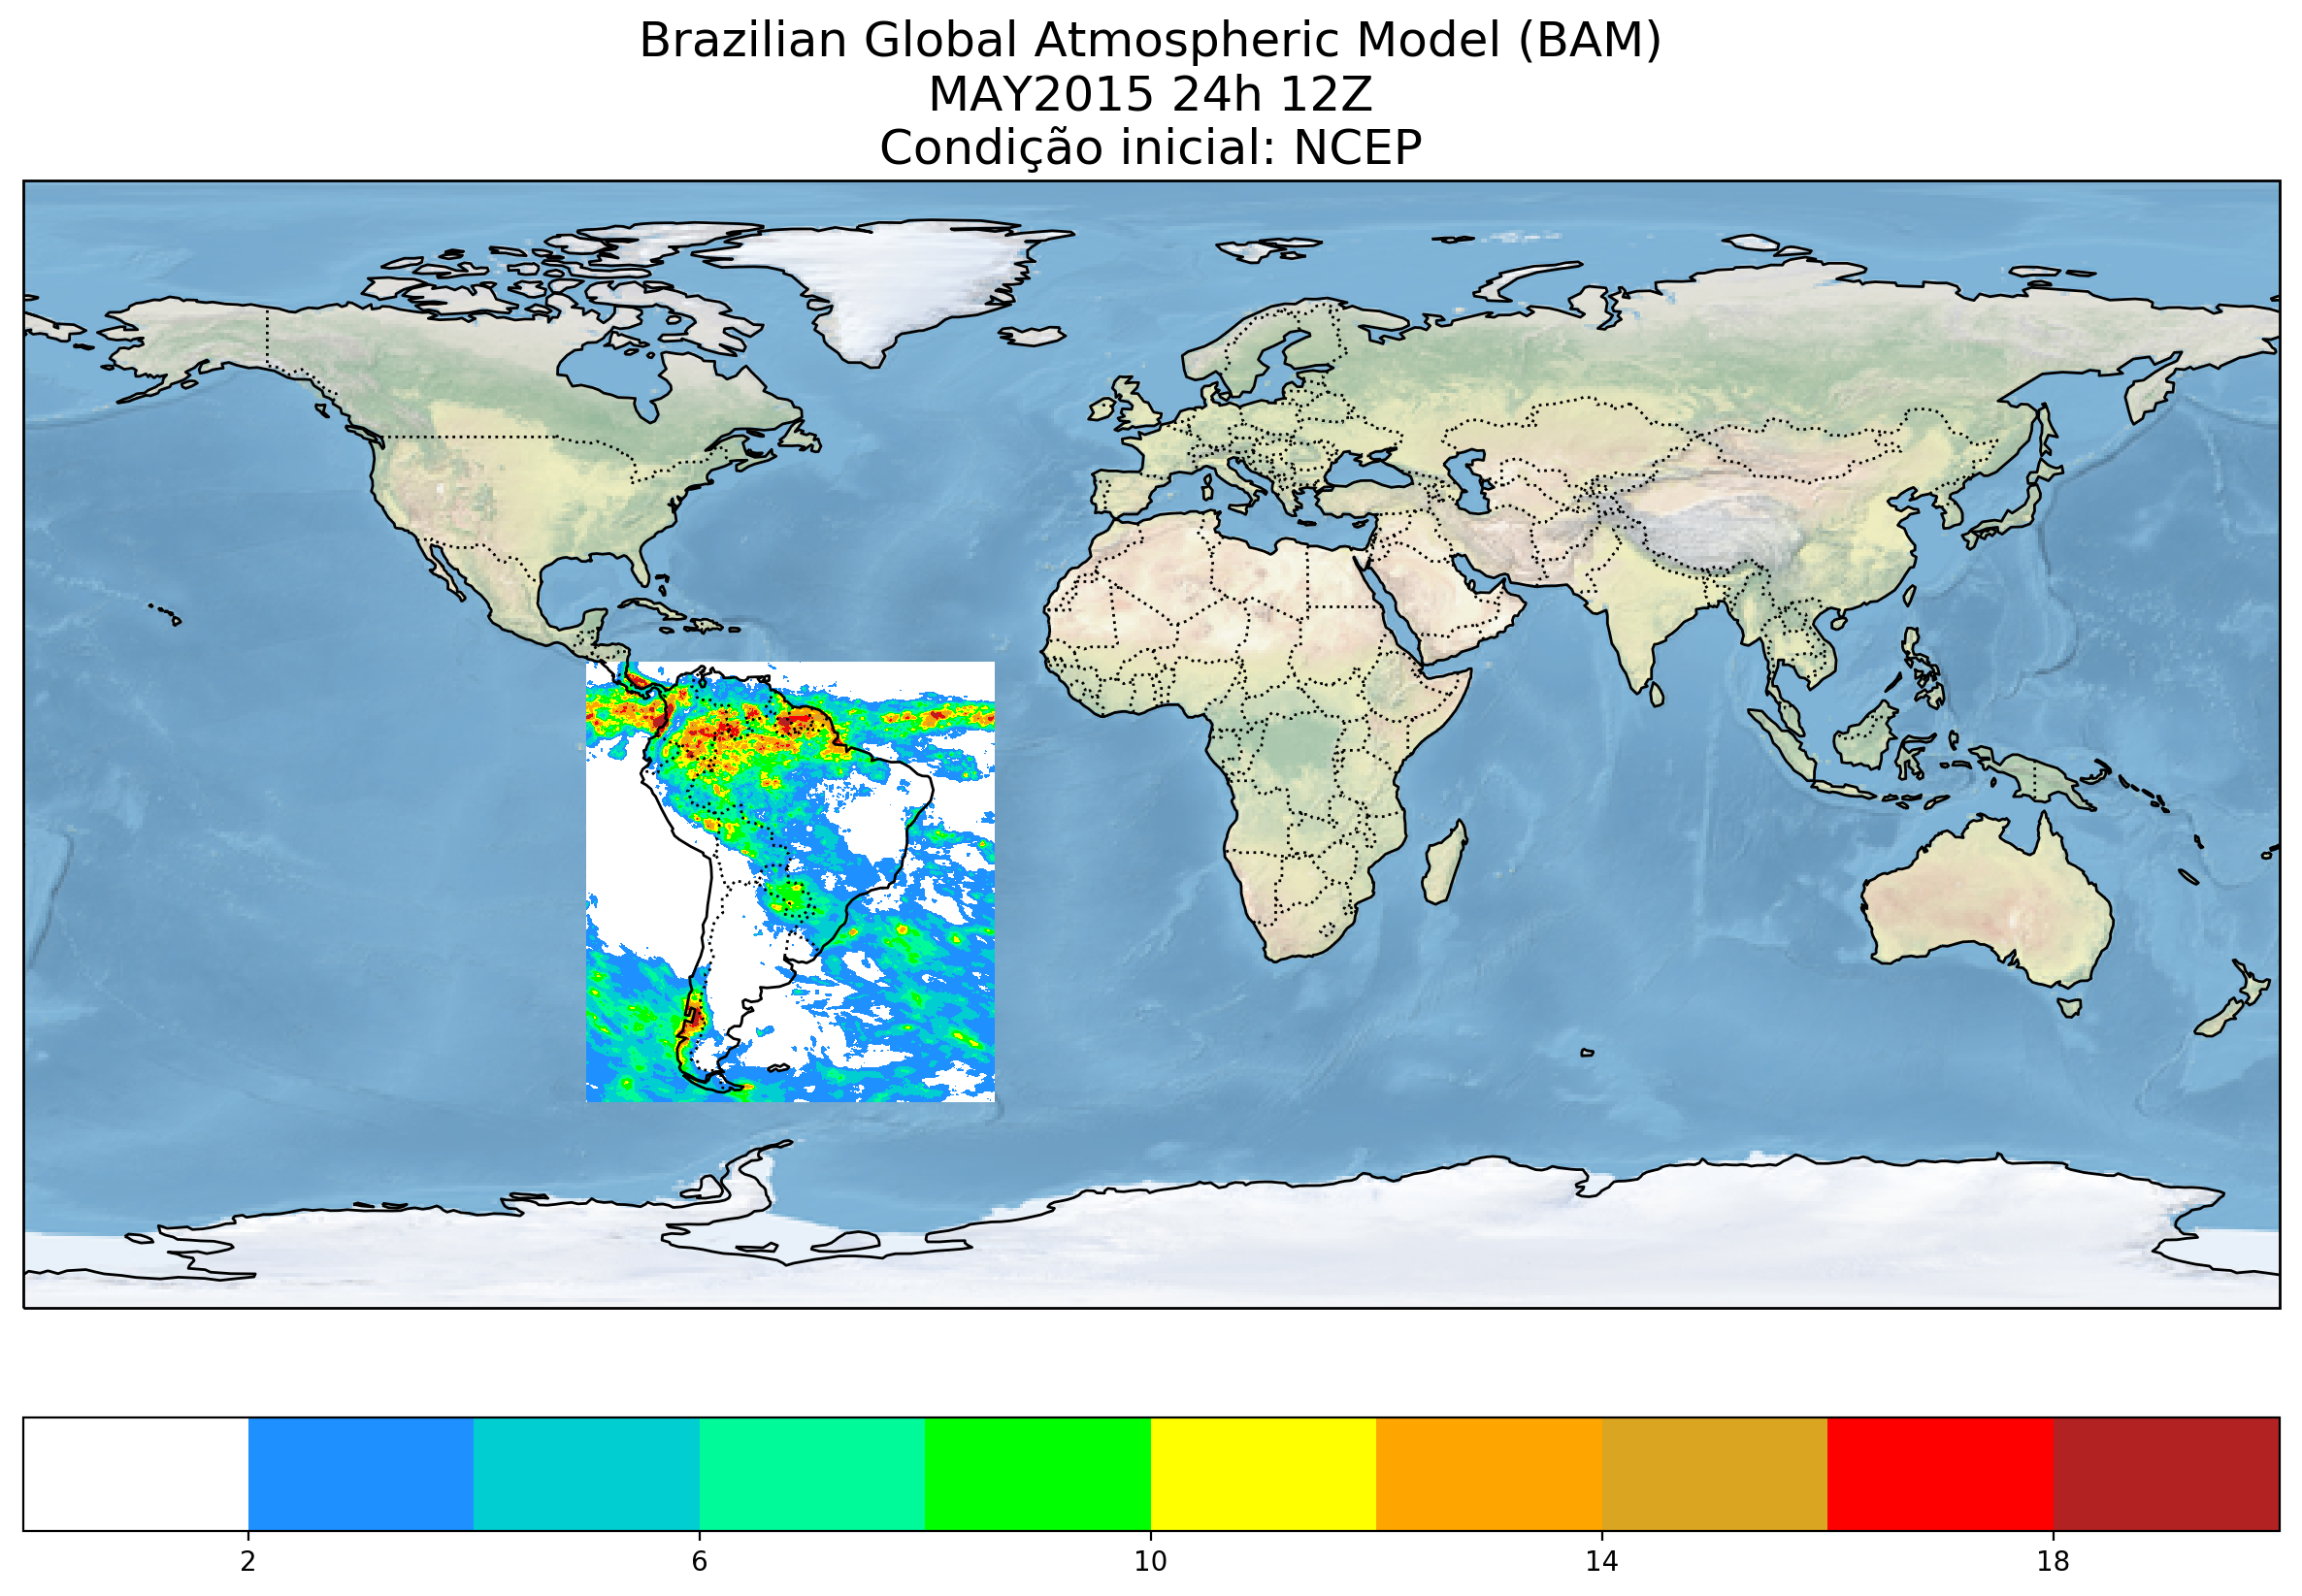

In [11]:
fig, ax = plt.subplots(111,figsize=(15,15), dpi=200)

ax = plt.axes(projection=ccrs.PlateCarree())
clevs=[-70,2,4,6,8,10,12,14,16,18,70]
color=['white',
       'dodgerblue',
       'darkturquoise',
       'mediumspringgreen',
       'lime',
       'yellow',
       'orange',
       'goldenrod',
       'red',
       'firebrick']
cp = plt.contourf(lons,lats,te, clevs, colors=color,zorder=1)


ax.coastlines(resolution='110m')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
#for BR
#ax.set_extent([-85, -30, -60, 15])
ax.stock_img()
ax.set_title(
                       'Brazilian Global Atmospheric Model (BAM)' 
                     + '\n' 
                     + 'MAY2015 24h 12Z'
                     + '\n'
                     + 'Condição inicial: NCEP',
                     fontsize=18
)

fig.colorbar(cp, orientation='horizontal',pad=0.05)
fig.set_label('mm')

plt.show()

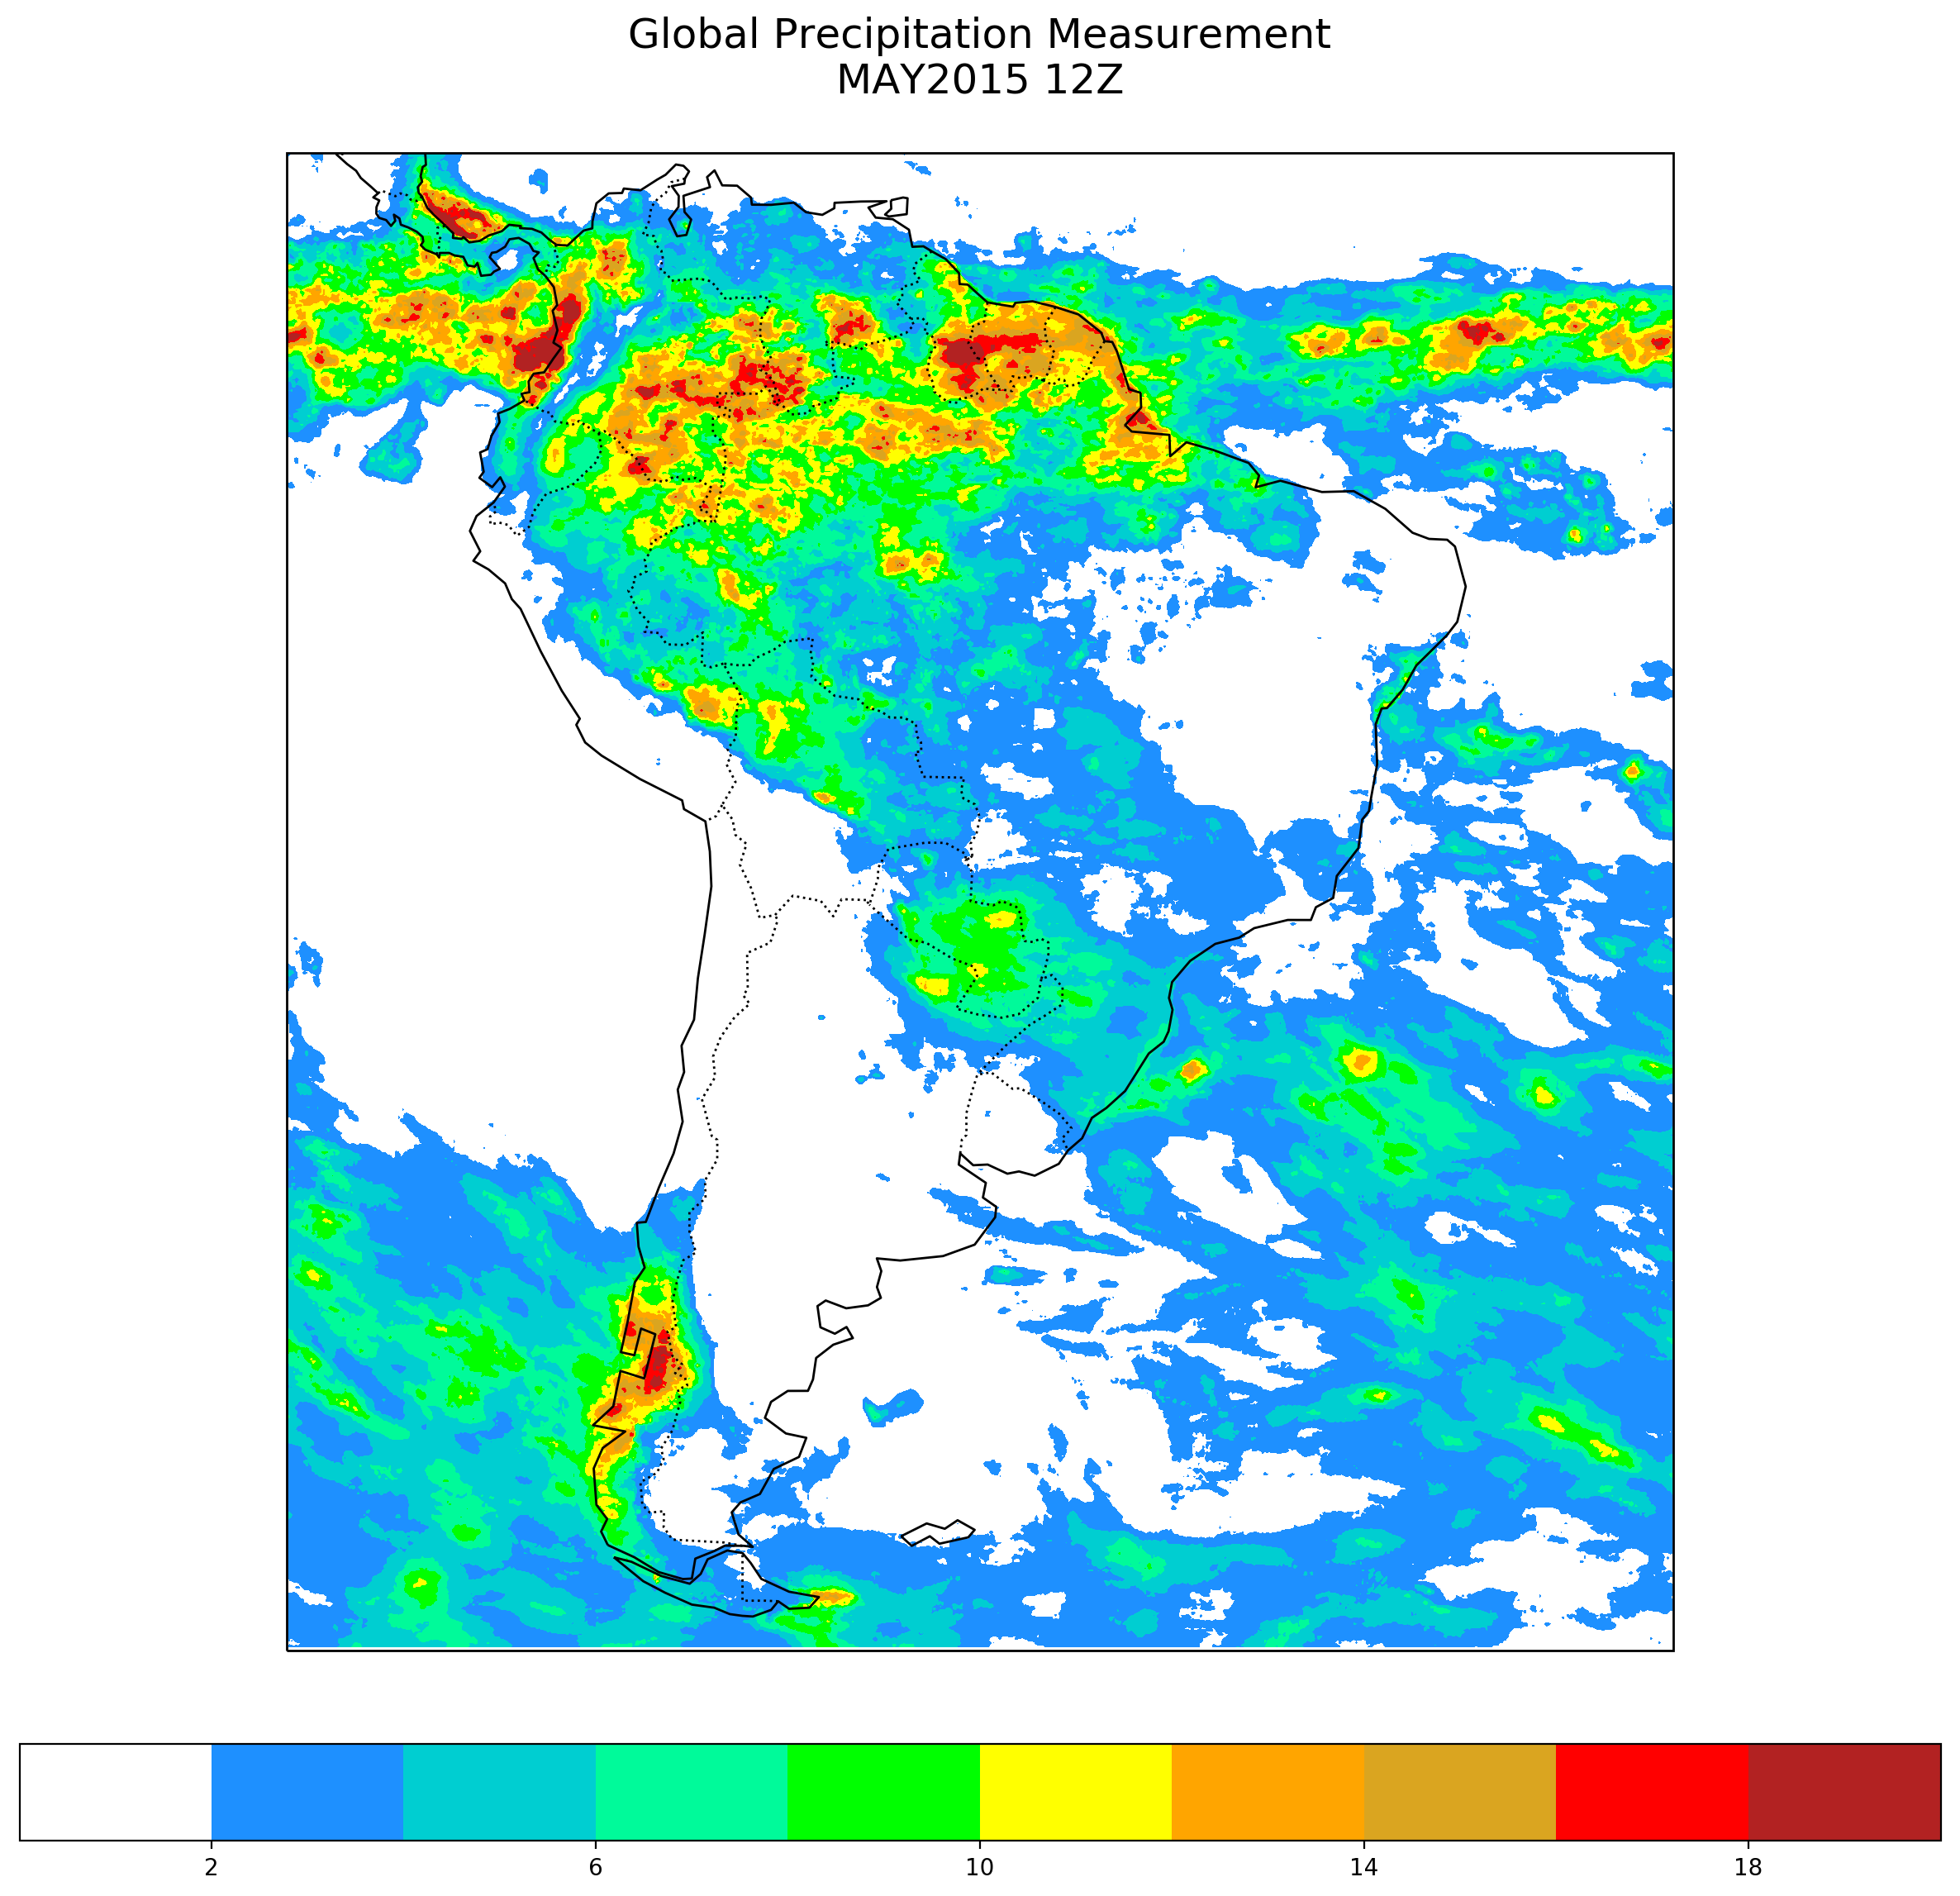

In [12]:
fig, ax = plt.subplots(111,figsize=(15,15), dpi=200)

ax = plt.axes(projection=ccrs.PlateCarree())
clevs=[-70,2,4,6,8,10,12,14,16,18,70]
color=['white',
       'dodgerblue',
       'darkturquoise',
       'mediumspringgreen',
       'lime',
       'yellow',
       'orange',
       'goldenrod',
       'red',
       'firebrick']
cp = plt.contourf(lons,lats,te, clevs, colors=color,zorder=1)


ax.coastlines(resolution='110m')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
#for BR
ax.set_extent([-90, -25, -53, 11])
#ax.stock_img()
ax.set_title(
                       'Global Precipitation Measurement' 
                     + '\n' 
                     + 'MAY2015 12Z'
                     + '\n',
                     fontsize=18
)

fig.colorbar(cp, orientation='horizontal',pad=0.05)
fig.set_label('mm')

plt.show()

In [13]:
import numpy as np
import seaborn as sns
import pandas as pd

from matplotlib import pylab

In [14]:
DS_SMG_V200 = xr.open_dataset(path +'MAY2015_24Z_12Z_SMG.nc')

DS_NCEP = xr.open_dataset(path +'MAY2015_24Z_12Z_NCEP.nc')

GFS = xr.open_dataset(path +'prev.2015.mar.24h_seldate.nc')

GPM = xr.open_dataset(path +'GPM_REC_ACUM_24h_grib2.nc')
#tt = DS_SMG_V200.prec[0:24,0:-12,295:310].mean(dim=['lon','lat'])
#tt = DS_SMG_V200.prec[:,0:-12,295:310]


In [29]:
GFS DS_NCEP

<xarray.Dataset>
Dimensions:       (latitude: 361, longitude: 720, time: 25)
Coordinates:
  * longitude     (longitude) float64 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
  * latitude      (latitude) float64 -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * time          (time) datetime64[ns] 2015-05-05T12:00:00 ... 2015-05-29T12:00:00
Data variables:
    APCP_surface  (time, latitude, longitude) float32 ...
Attributes:
    CDI:                  Climate Data Interface version 1.6.2 (http://code.z...
    Conventions:          COARDS
    history:              Fri Jun 15 17:12:52 2018: cdo -r seldate,2015-05-05...
    History:              created by wgrib2
    GRIB2_grid_template:  0
    CDO:                  Climate Data Operators version 1.6.2 (http://code.z...

# NCEP

In [15]:
tt2 = DS_NCEP.prec[:,83:-12,295:310].mean('time')
df2 = tt2.to_dataframe()
df2.head()

prec
lat       lon            
-56.53713 118.0  2.102946
          118.4  2.124675
          118.8  2.149902
          119.2  2.184570
          119.6  2.220296

# GPM

In [16]:
#tt1 = GPM.PREC_surface[:,5:-12,295:310].mean('time')
tt1 = GPM.PREC_surface[:,83:-12,295:310].mean('time')
df1 = tt1.to_dataframe()
df1.head()

PREC_surface
latitude longitude              
-48.75   299.45           0.7100
         299.55           0.8525
         299.65           0.8775
         299.75           0.8575
         299.85           0.7300

#  GFS

In [17]:
tt3 = GFS.APCP_surface[:,83:-12,295:310].mean('time')
df3 = tt3.to_dataframe()
df3.head()

APCP_surface
latitude longitude              
-48.5    147.5          4.521999
         148.0          4.310800
         148.5          4.311999
         149.0          4.547199
         149.5          4.473599

# SMG V200

In [18]:
tt = DS_SMG_V200.prec[:,83:-12,295:310].mean('time')
df = tt.to_dataframe()
df.head()

prec
lat       lon            
-56.53713 118.0  2.503438
          118.4  2.516875
          118.8  2.530391
          119.2  2.588828
          119.6  2.654375

In [19]:
import seaborn as sns
sns.set()

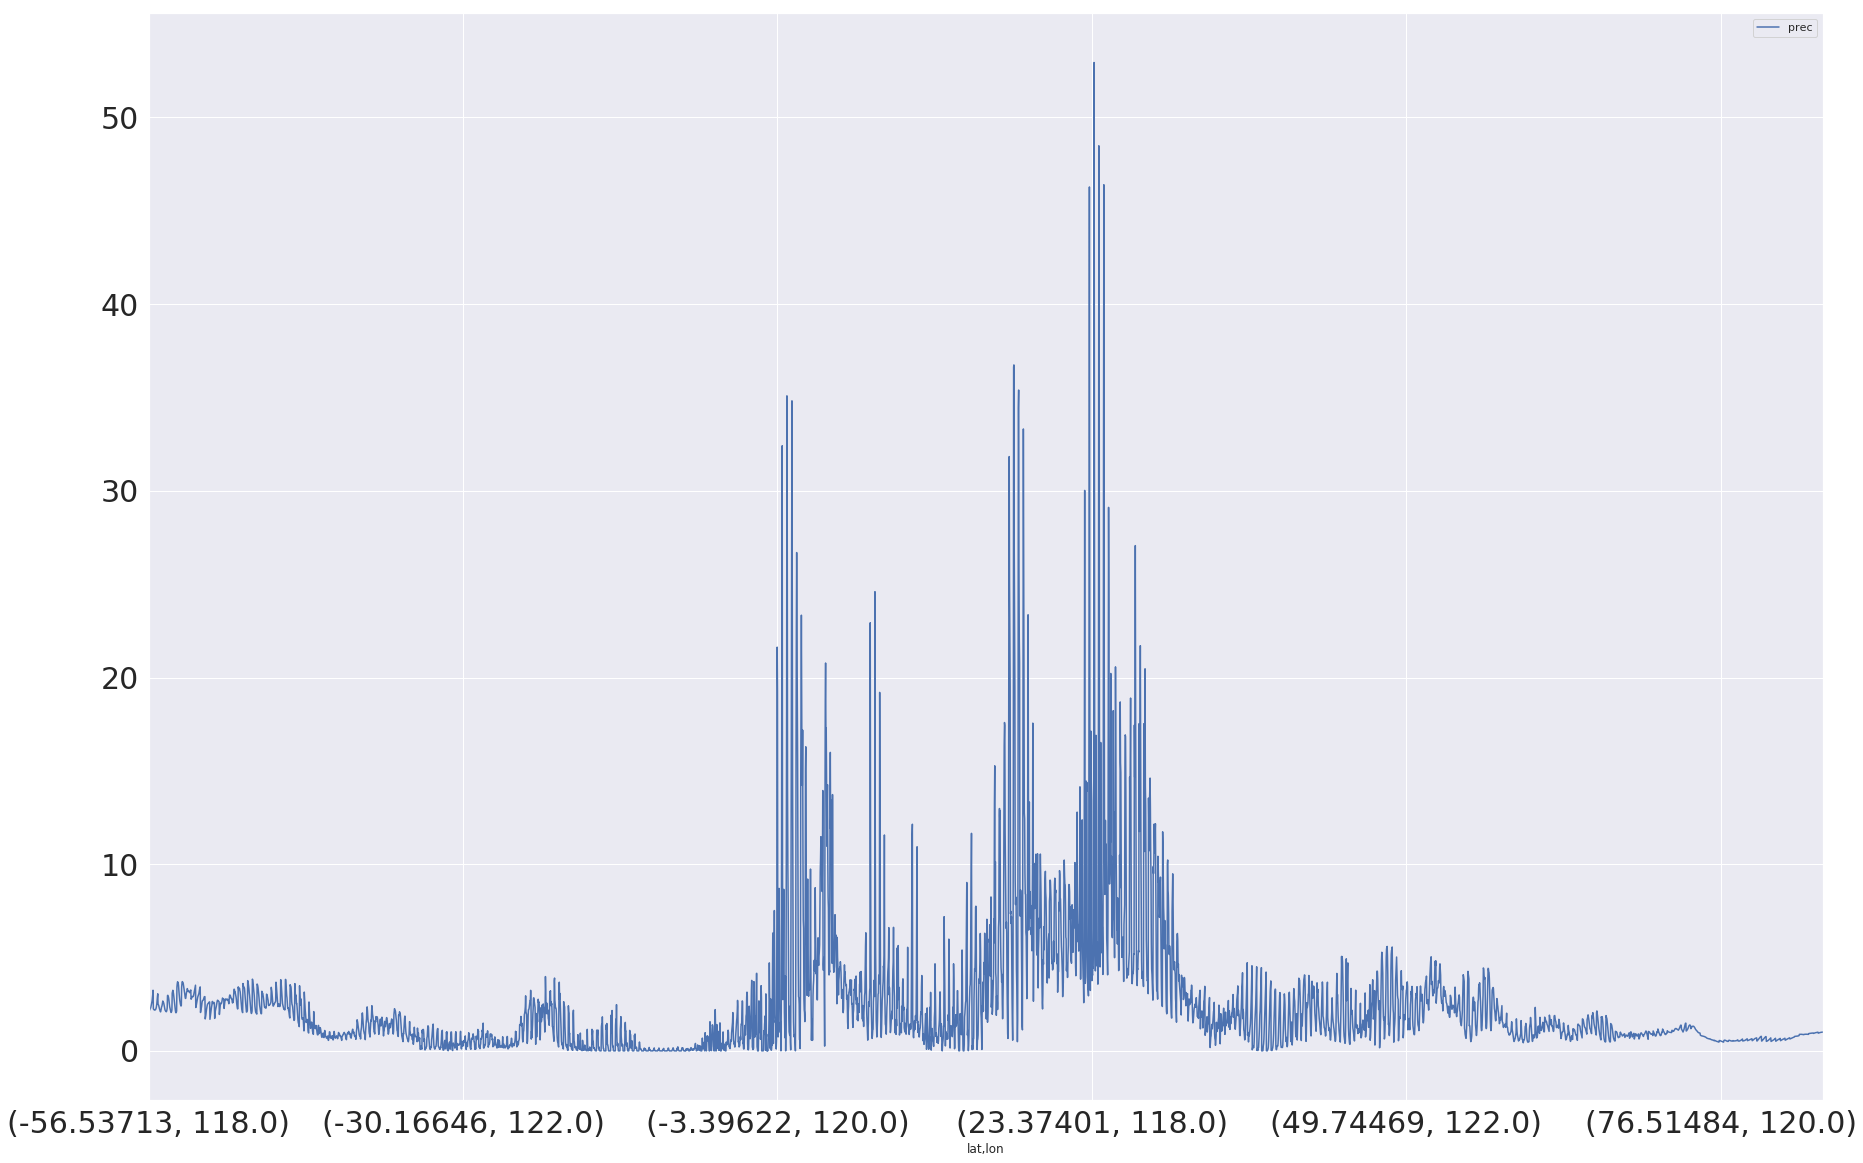

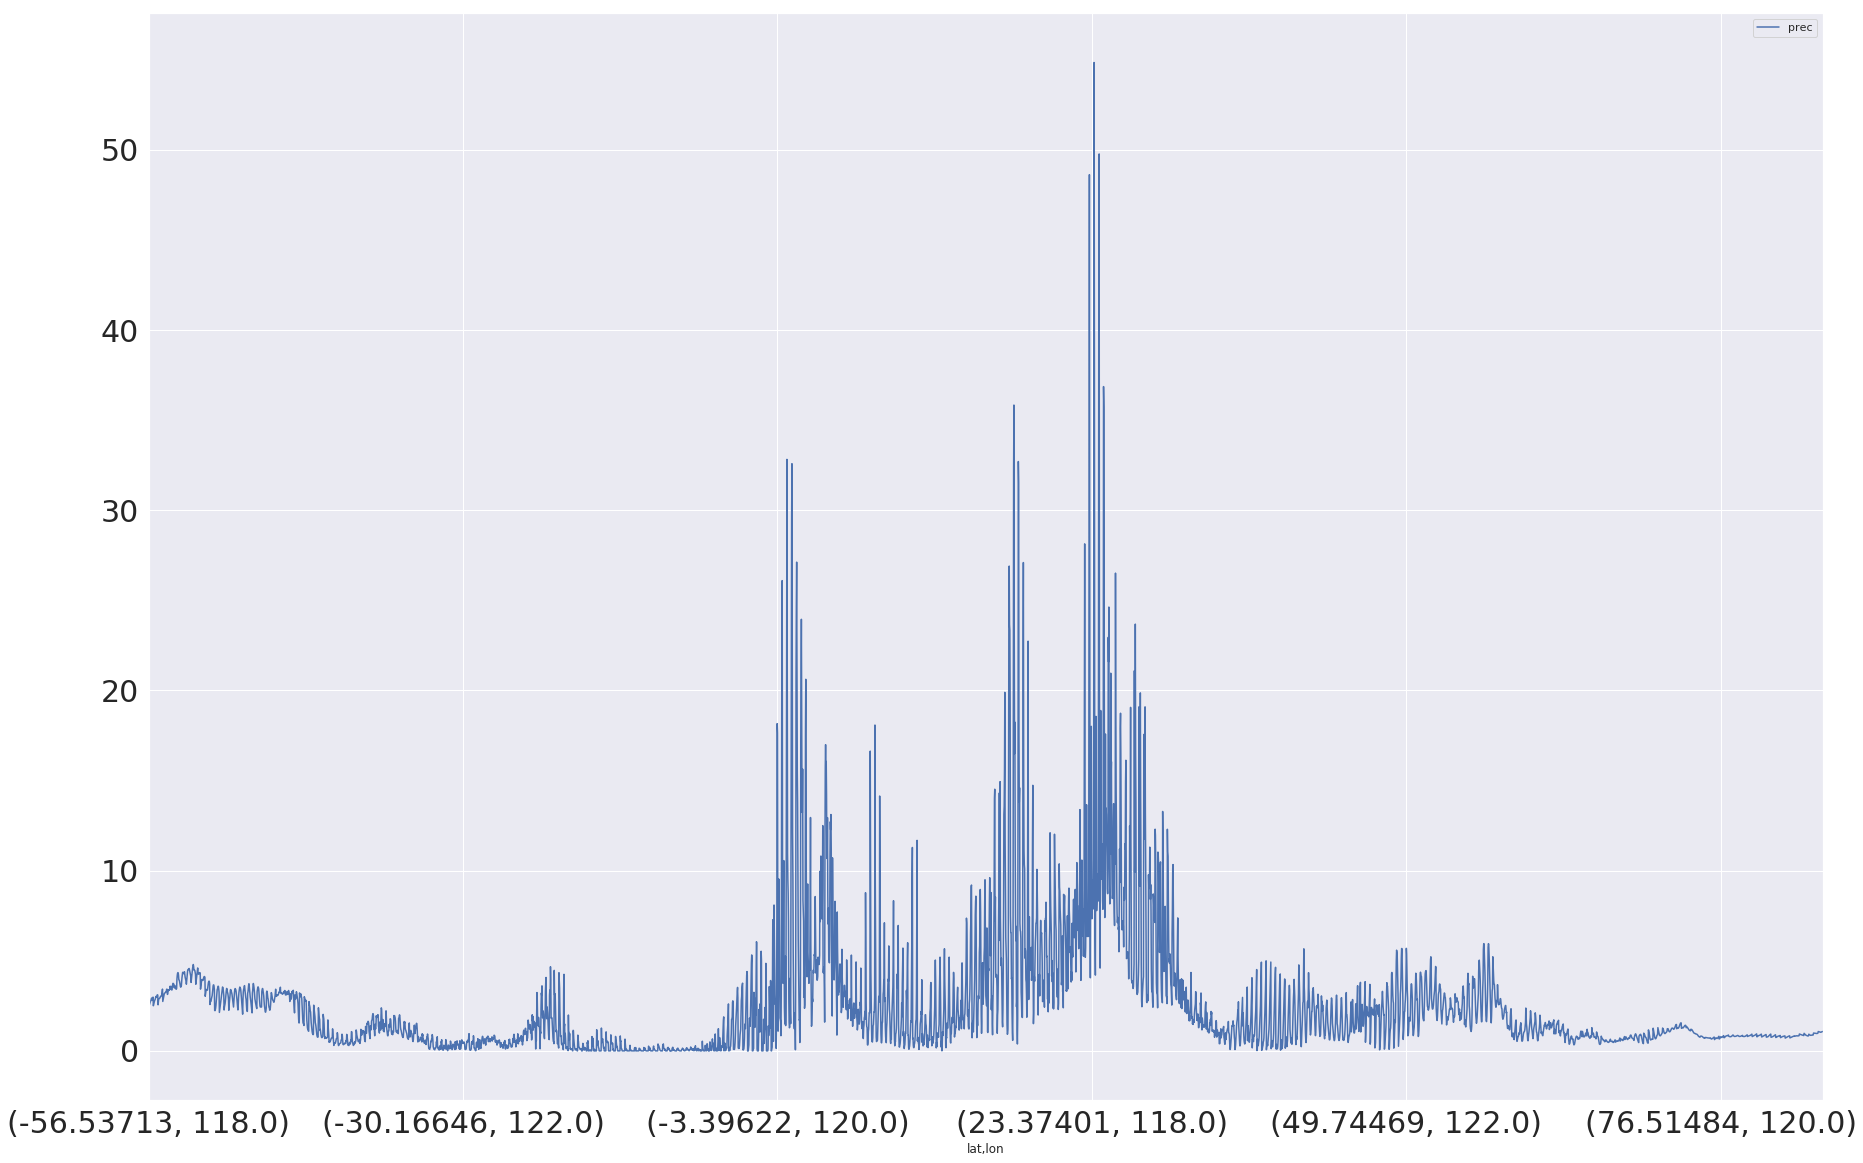

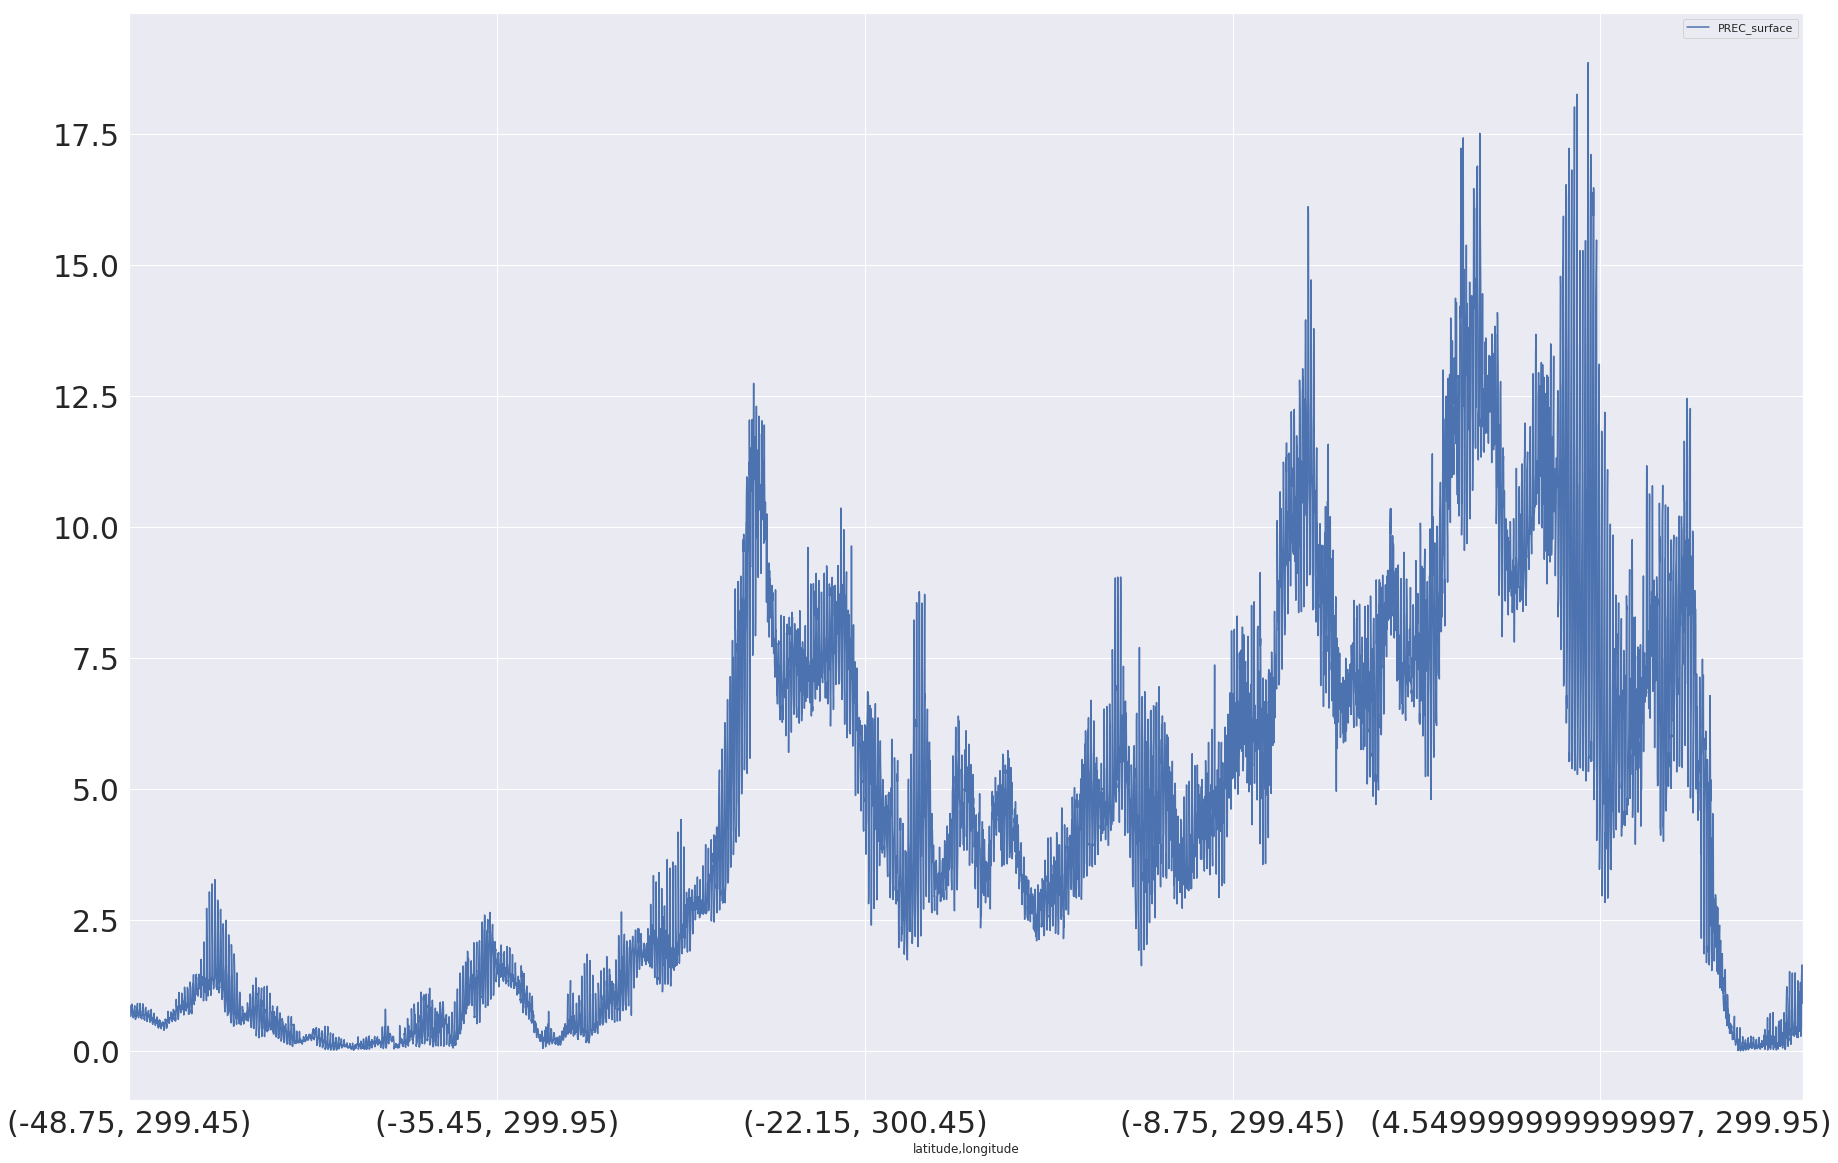

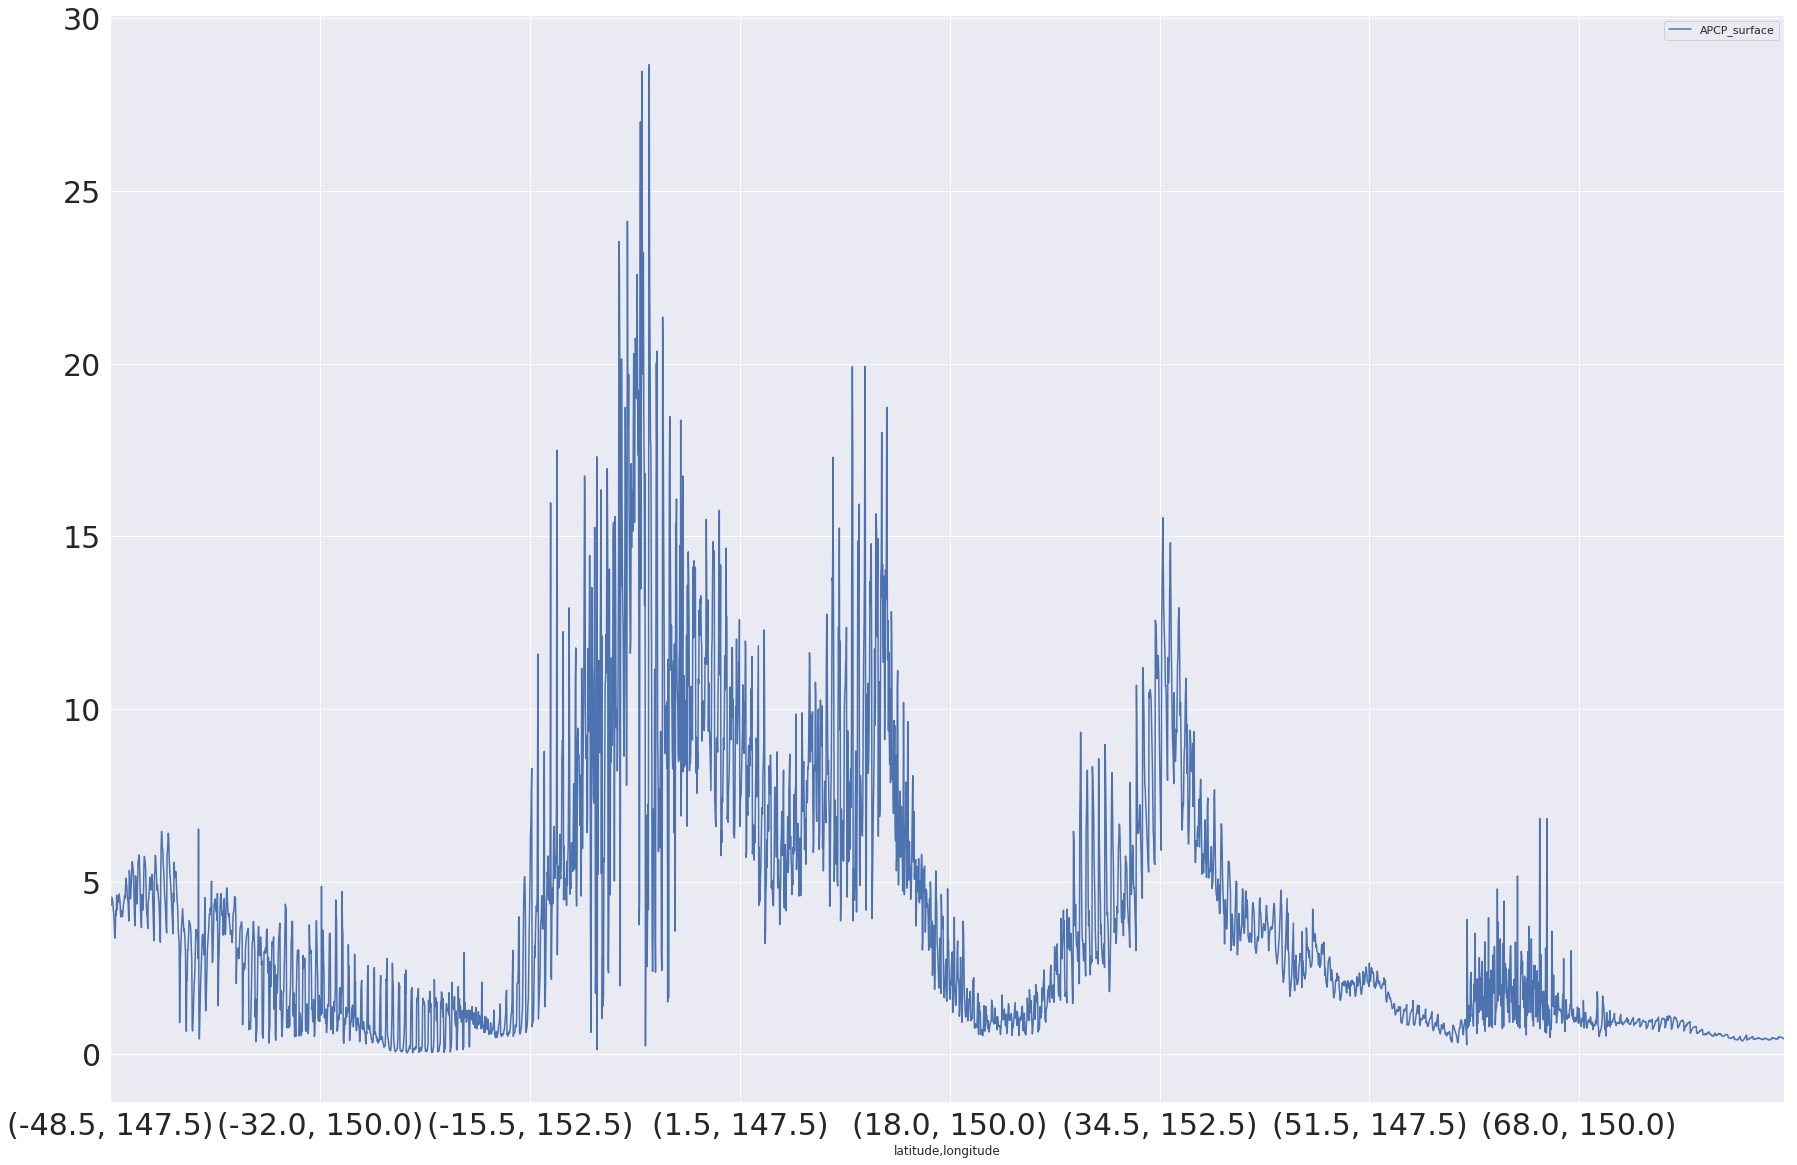

In [20]:
sns.set()
pylab.rcParams['figure.figsize'] = (30,20)
# BAM NCEP
df2.plot(fontsize=30)
#SMG V200
df.plot(fontsize=30)
# GPM
df1.plot(fontsize=30)
# GFS
df3.plot(fontsize=30)

In [21]:
a = np.average(df)
a

2.5671027

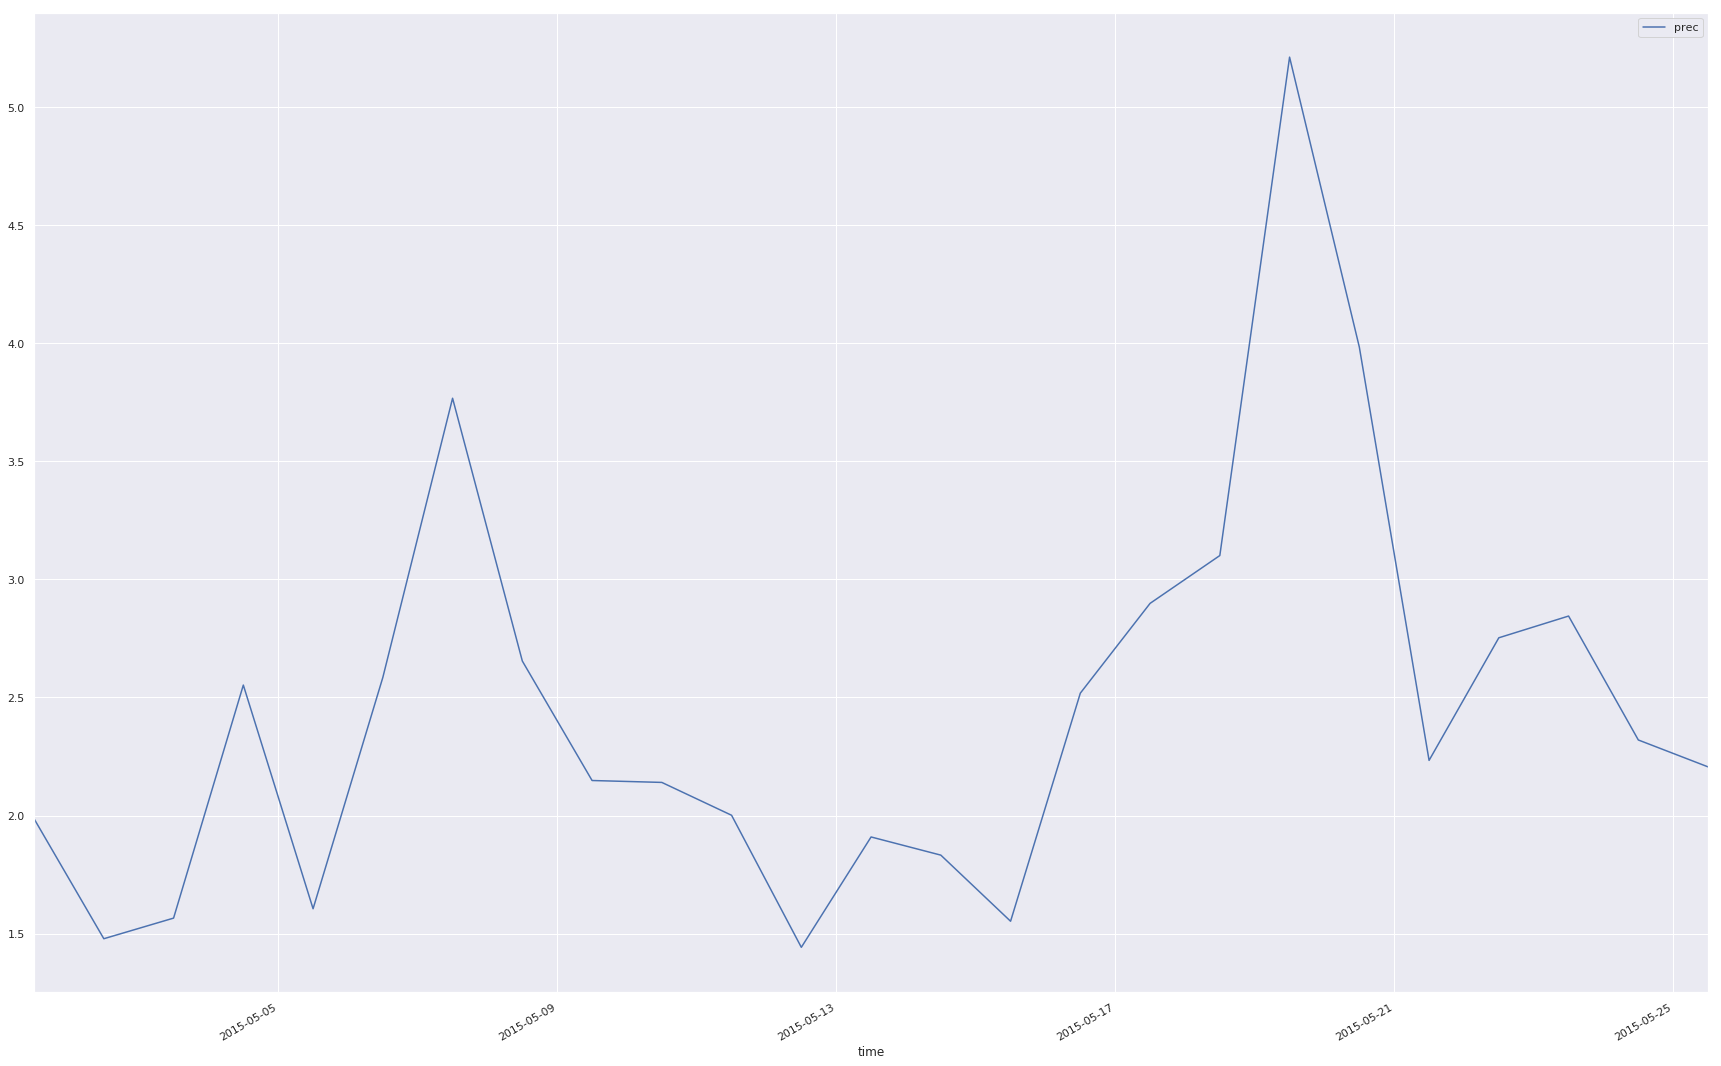

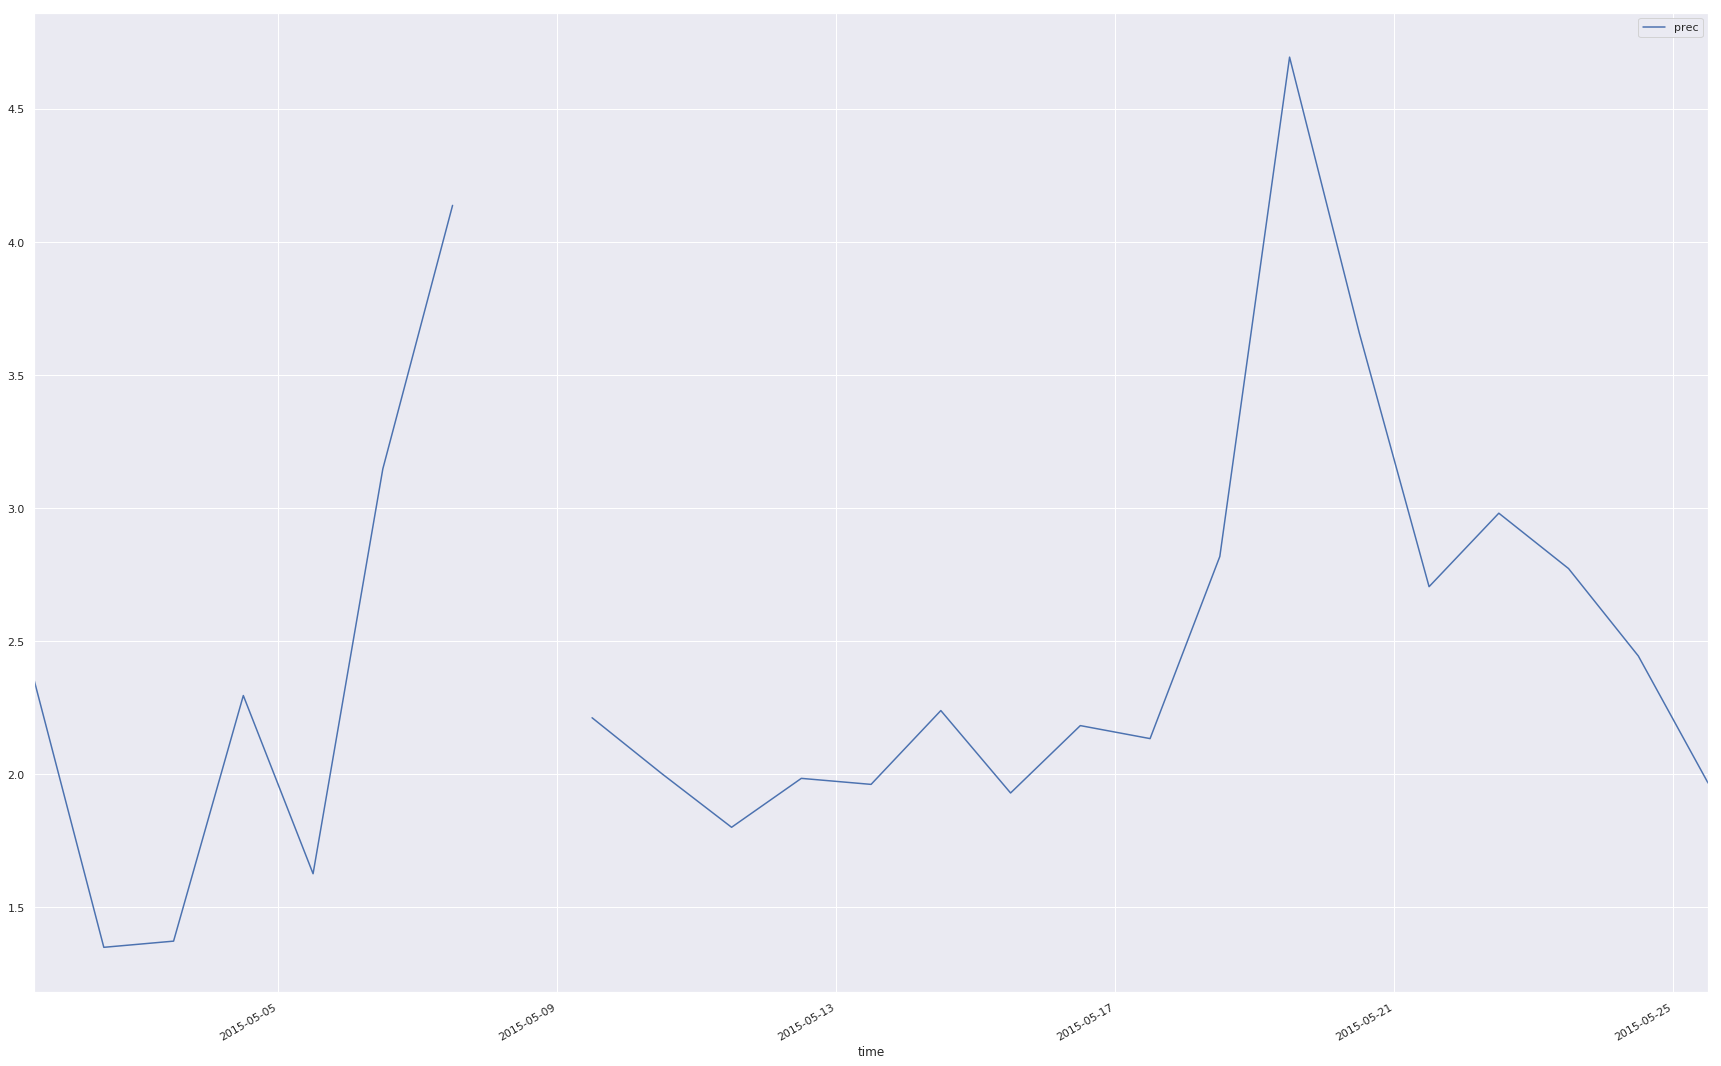

In [43]:
tt = DS_SMG_V200.prec[:,24:-12,295:310].mean(dim=['lat','lon'])
tt2 = DS_NCEP.prec[:,24:-12,295:310].mean(dim=['lat','lon'])
df = tt.to_dataframe()
df2 = tt2.to_dataframe()
df.head()
df.plot()
df2.plot()

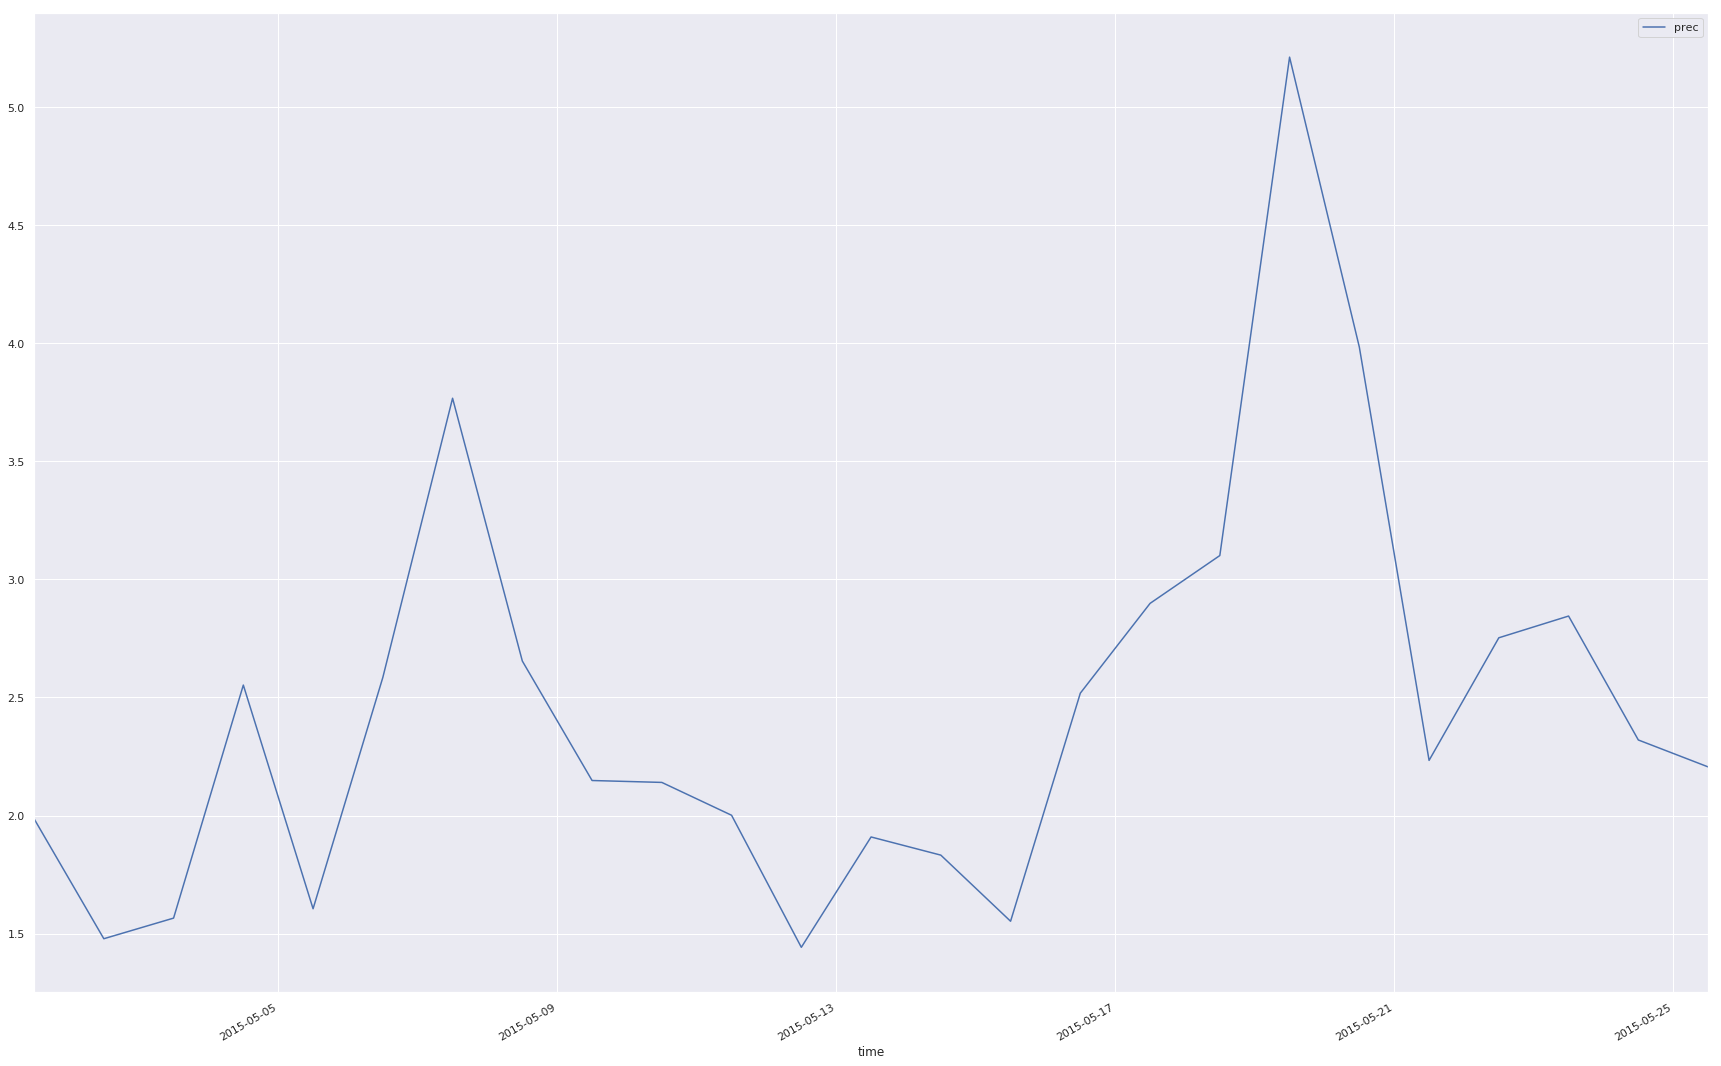

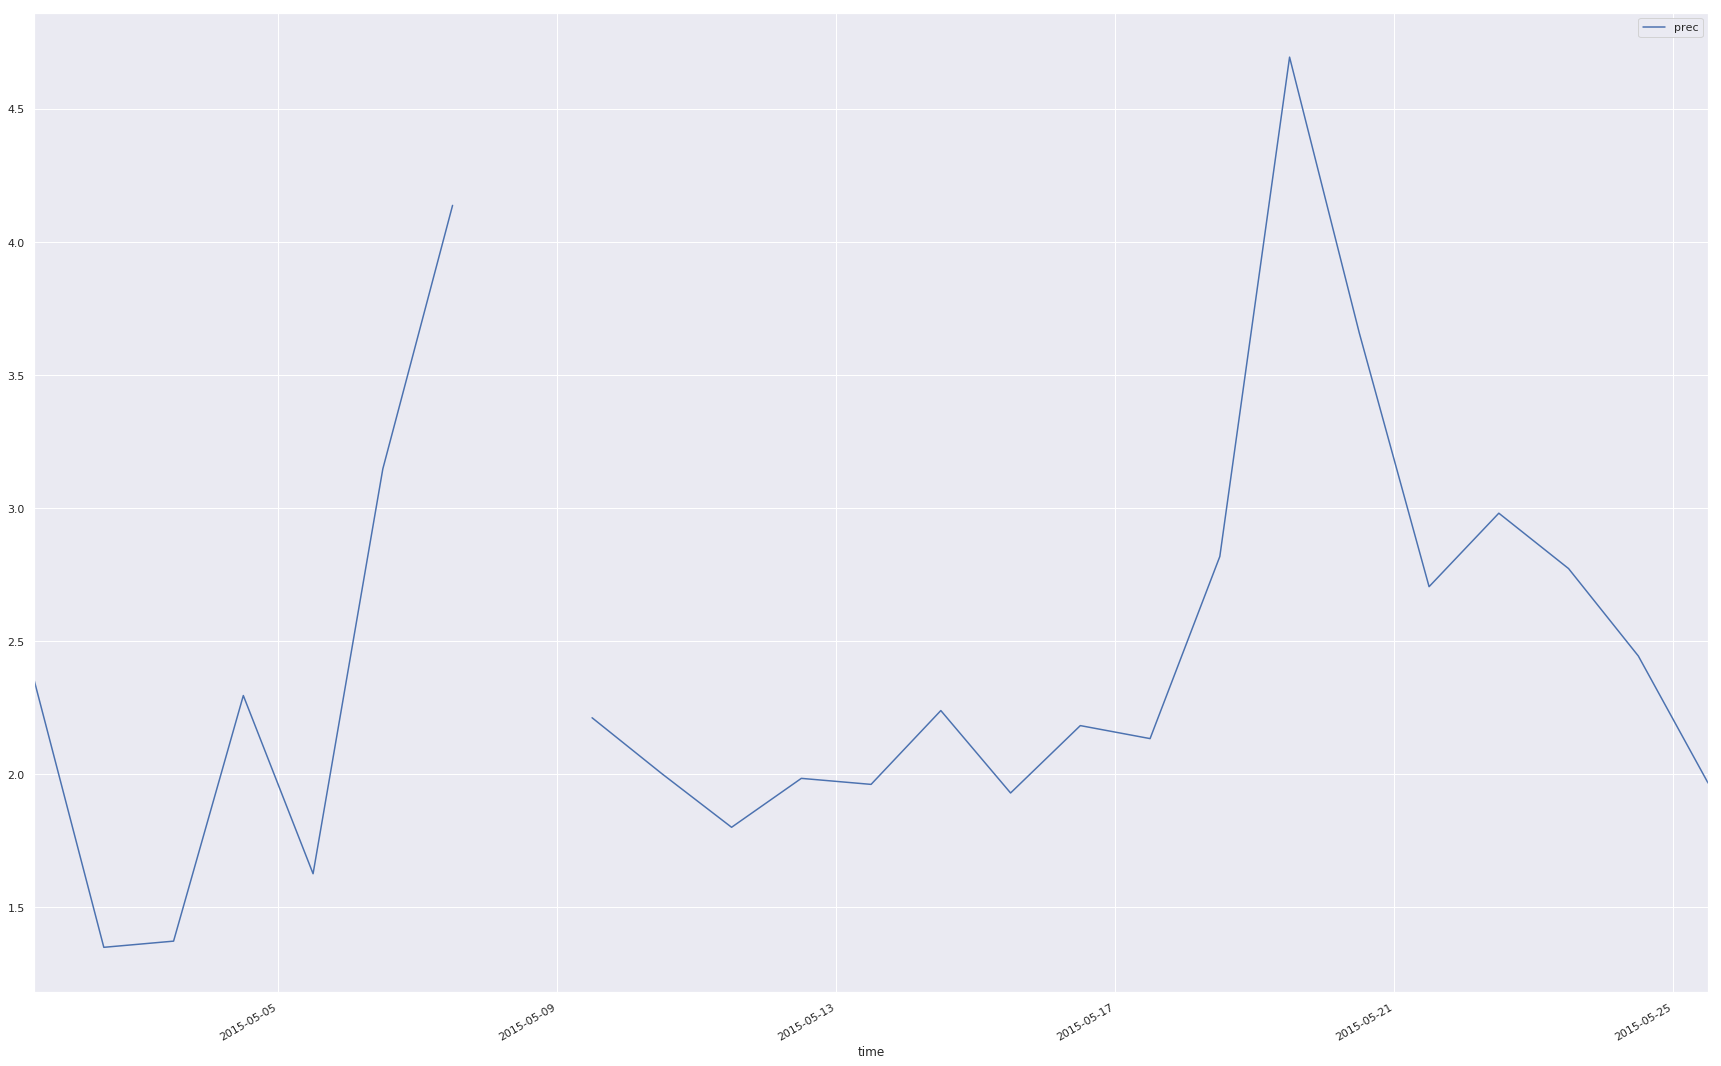

In [44]:
df.plot()
df2.plot()

In [28]:
import xesmf as xe

GFS - > DS_NCEP

In [32]:
DS_NCEP['lat'].values, DS_NCEP['lon'].values

(array([-89.69415, -89.29794, -88.8994 , -88.50032, -88.10105, -87.70167,
        -87.30225, -86.90279, -86.50331, -86.10381, -85.7043 , -85.30479,
        -84.90526, -84.50574, -84.10621, -83.70667, -83.30714, -82.9076 ,
        -82.50806, -82.10851, -81.70897, -81.30943, -80.90988, -80.51033,
        -80.11079, -79.71124, -79.31169, -78.91214, -78.51259, -78.11304,
        -77.71349, -77.31394, -76.91439, -76.51484, -76.11528, -75.71573,
        -75.31618, -74.91663, -74.51708, -74.11752, -73.71797, -73.31842,
        -72.91886, -72.51931, -72.11976, -71.7202 , -71.32065, -70.9211 ,
        -70.52154, -70.12199, -69.72244, -69.32288, -68.92333, -68.52377,
        -68.12422, -67.72466, -67.32511, -66.92556, -66.526  , -66.12645,
        -65.72689, -65.32734, -64.92778, -64.52823, -64.12867, -63.72912,
        -63.32956, -62.93001, -62.53045, -62.1309 , -61.73134, -61.33179,
        -60.93223, -60.53268, -60.13312, -59.73357, -59.33401, -58.93446,
        -58.5349 , -58.13535, -57.7357

In [34]:
GFS['latitude'].values, GFS['longitude'].values

(array([-90. , -89.5, -89. , -88.5, -88. , -87.5, -87. , -86.5, -86. ,
        -85.5, -85. , -84.5, -84. , -83.5, -83. , -82.5, -82. , -81.5,
        -81. , -80.5, -80. , -79.5, -79. , -78.5, -78. , -77.5, -77. ,
        -76.5, -76. , -75.5, -75. , -74.5, -74. , -73.5, -73. , -72.5,
        -72. , -71.5, -71. , -70.5, -70. , -69.5, -69. , -68.5, -68. ,
        -67.5, -67. , -66.5, -66. , -65.5, -65. , -64.5, -64. , -63.5,
        -63. , -62.5, -62. , -61.5, -61. , -60.5, -60. , -59.5, -59. ,
        -58.5, -58. , -57.5, -57. , -56.5, -56. , -55.5, -55. , -54.5,
        -54. , -53.5, -53. , -52.5, -52. , -51.5, -51. , -50.5, -50. ,
        -49.5, -49. , -48.5, -48. , -47.5, -47. , -46.5, -46. , -45.5,
        -45. , -44.5, -44. , -43.5, -43. , -42.5, -42. , -41.5, -41. ,
        -40.5, -40. , -39.5, -39. , -38.5, -38. , -37.5, -37. , -36.5,
        -36. , -35.5, -35. , -34.5, -34. , -33.5, -33. , -32.5, -32. ,
        -31.5, -31. , -30.5, -30. , -29.5, -29. , -28.5, -28. , -27.5,
      

In [35]:
GPM['latitude'].values, GPM['longitude'].values

(array([-5.705e+01, -5.695e+01, -5.685e+01, -5.675e+01, -5.665e+01,
        -5.655e+01, -5.645e+01, -5.635e+01, -5.625e+01, -5.615e+01,
        -5.605e+01, -5.595e+01, -5.585e+01, -5.575e+01, -5.565e+01,
        -5.555e+01, -5.545e+01, -5.535e+01, -5.525e+01, -5.515e+01,
        -5.505e+01, -5.495e+01, -5.485e+01, -5.475e+01, -5.465e+01,
        -5.455e+01, -5.445e+01, -5.435e+01, -5.425e+01, -5.415e+01,
        -5.405e+01, -5.395e+01, -5.385e+01, -5.375e+01, -5.365e+01,
        -5.355e+01, -5.345e+01, -5.335e+01, -5.325e+01, -5.315e+01,
        -5.305e+01, -5.295e+01, -5.285e+01, -5.275e+01, -5.265e+01,
        -5.255e+01, -5.245e+01, -5.235e+01, -5.225e+01, -5.215e+01,
        -5.205e+01, -5.195e+01, -5.185e+01, -5.175e+01, -5.165e+01,
        -5.155e+01, -5.145e+01, -5.135e+01, -5.125e+01, -5.115e+01,
        -5.105e+01, -5.095e+01, -5.085e+01, -5.075e+01, -5.065e+01,
        -5.055e+01, -5.045e+01, -5.035e+01, -5.025e+01, -5.015e+01,
        -5.005e+01, -4.995e+01, -4.985e+01, -4.9

In [22]:
#lonss = GPM.variables['longitude'][:]
#latss = GPM.variables['latitude'][:]
#pylab.rcParams['figure.figsize'] = (20,5)
#ax = plt.axes(projection=ccrs.PlateCarree())
#plt.contourf(lonss,latss,te, 70, transform=ccrs.PlateCarree())
#ax.coastlines()
#ax.stock_img()
#da.plot()
#plt.show()

In [23]:
#DS_SMG_V200 = xr.open_dataset(path +'MAY2015_24Z_12Z_SMG.nc')
#tt = DS_SMG_V200.prec.mean('time')
#lons = DS_NCEP.variables['lon'][:]
#lats = DS_NCEP.variables['lat'][:]

In [24]:
#pylab.rcParams['figure.figsize'] = (20,5)
#ax = plt.axes(projection=ccrs.Robinson())
#plt.contourf(lons,lats,tt, 70, transform=ccrs.PlateCarree(),cmap=plt.cm.RdBu_r)
#ax.coastlines()
#ax.stock_img()
#da.plot()
#plt.show()

In [25]:
#from cartopy.io import shapereader
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

#def make_map(projection=ccrs.PlateCarree()):
#    fig, ax = plt.subplots(figsize=(9,13), subplot_kw=dict(projection=projection))
#    gl = ax.gridlines(draw_labels=True)
#    gl.xlabels_top = gl.ylabels_rigt = False
#    gl.xformatter = LONGITUDE_FORMATTER
#    gl.yformatter = LATITUDE_FORMATTER
#    return fig,ax

In [26]:
#import cartopy.io.img_tiles as cimgt

#extent = [-39, -38.25, -13.25, -12.5]
#request = cimgt.GoogleTiles()

In [27]:
#fig, ax = make_map(projection=request.crs)
#ax.set_extent(extent)
#ax.add_image(request, 10)
#ax.plot()
